In [406]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import missingno as mno


pd.set_option("display.max_columns", 101)

In [407]:
# Dataset is already loaded below
# missing_values = ["n/a", "na", "--","-"]
# data = pd.read_csv("train.csv",na_values=missing_values)
data = pd.read_csv("train.csv")

## Data Wrangling

In [408]:
data

,id,name,table_bookings,online_ordering,location,rating,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,dining_cost
0,19340,Plan B,No,No,Greenwich,4.2/5,1651.0,8041609100,Casual Dining,Pubs and bars,7.0,4.0,American,1.0
1,31103,Hunan,No,Yes,Tribeca,4.3 /5,2248.0,080 25520154,Casual Dining,Dine-out,7.0,3.0,Chinese,1.0
2,17563,Lavonne,No,No,Greenwich,4.4/5,1095.0,9740954505,Cafe,Cafes,7.0,2.0,Snacks,1.0
3,11192,Ambur Star Dum Burger,Yes,No,Chelsea,3.4/5,17.0,"7200110202\r, 9840017416",Quick Bites,Dine-out,1.0,1.0,Italian,0.0
4,21324,Dadi's Dum Burger,Yes,Yes,Lower Manhattan,4.1 /5,2727.0,"7090999991, 7090599999",Casual Dining,Dine-out,7.0,3.0,Italian,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,36111,Bisimillah Biriyani's & Kebab's,No,No,Lower Manhattan,3.3 /5,6.0,8050077699\n 9731841212,Quick Bites,Delivery,1.0,2.0,Italian,0.0
2431,11401,Jayanthi Johnson,No,No,Tribeca,3.1/5,21.0,NaN,Quick Bites,Dine-out,1.0,3.0,Mexican,0.0
2432,17101,Kairos,No,No,East Village,3.8/5,63.0,"080 40752007, 8861128718",Cafe,Dine-out,2.0,3.0,Snacks,1.0
2433,3086,Sharma Ji Chaats And Desi khana,No,No,Chelsea,NEW,0.0,9980923409,Quick Bites,Delivery,1.0,2.0,American,0.0


In [409]:
data.describe()

,id,votes,popular_dishes,cuisines_offered,dining_cost
count,2435.000000,2391.000000,2316.000000,2413.00000,2435.000000
mean,24562.075975,486.398996,3.569948,2.58765,0.520329
std,14043.041772,1294.380994,2.816004,1.29975,0.499689
min,53.000000,0.000000,1.000000,1.00000,0.000000
25%,11191.000000,9.500000,1.000000,2.00000,0.000000
50%,22754.000000,66.000000,1.500000,2.00000,1.000000
75%,34879.000000,383.000000,7.000000,3.00000,1.000000
max,51708.000000,14723.000000,7.000000,8.00000,1.000000


In [410]:
data.dtypes

id                        int64
name                     object
table_bookings           object
online_ordering          object
location                 object
rating                   object
votes                   float64
phone                    object
restaurant_type          object
restaurant_operation     object
popular_dishes          float64
cuisines_offered        float64
primary_cuisine          object
dining_cost             float64
dtype: object

In [411]:
data.drop(columns=['name','phone'],inplace=True)

In [412]:
data.isnull().sum()

id                        0
table_bookings            0
online_ordering           0
location                  0
rating                  351
votes                    44
restaurant_type         112
restaurant_operation     20
popular_dishes          119
cuisines_offered         22
primary_cuisine          17
dining_cost               0
dtype: int64

<AxesSubplot:>

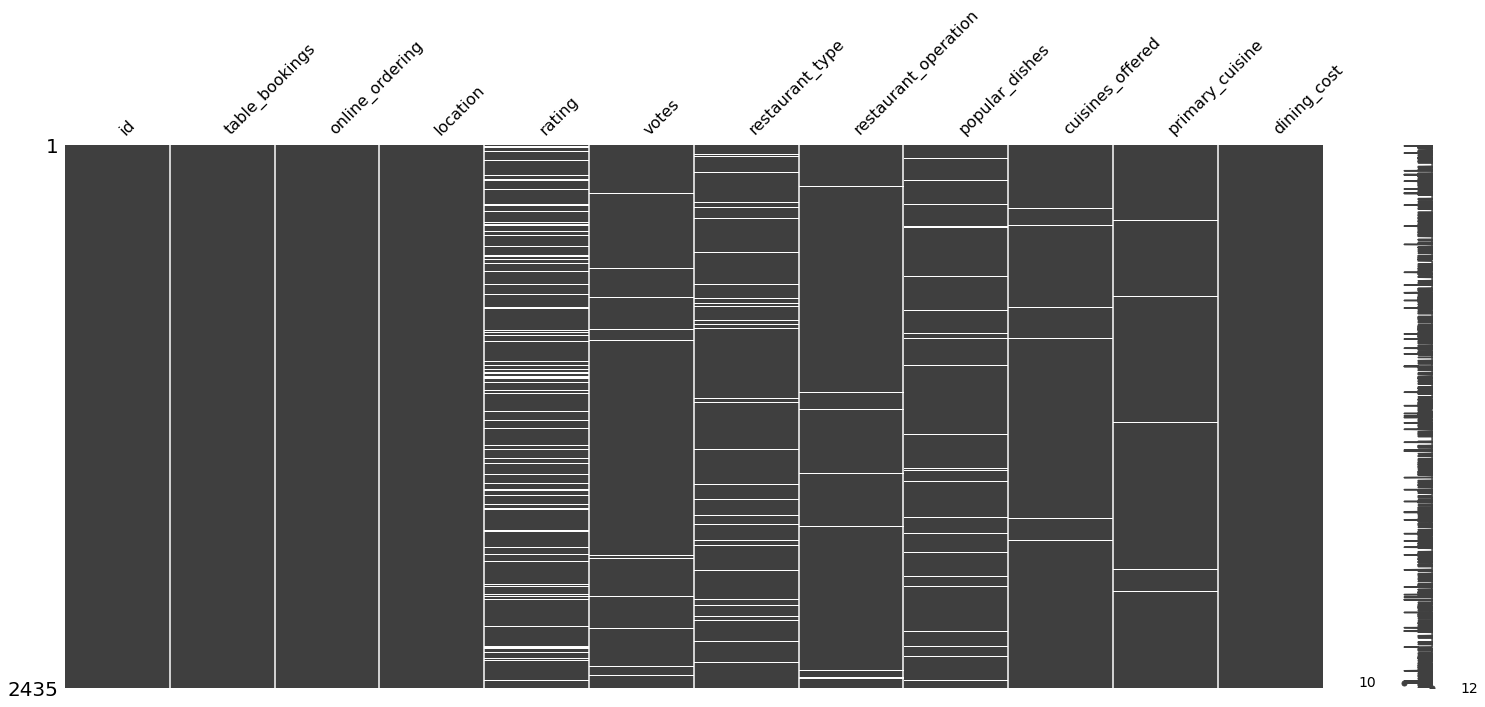

In [413]:
mno.matrix(data)

In [373]:
tmp = {}
for col in data.columns:
    if data[col].dtype ==('object'):
        tmp[col] = data[col].value_counts()
tmp

{'table_bookings': Yes    1511
 No      924
 Name: table_bookings, dtype: int64,
 'online_ordering': No     1929
 Yes     506
 Name: online_ordering, dtype: int64,
 'location': Lower Manhattan             560
 Tribeca                     324
 East Village                294
 Midtown                     283
 Chinatown                   268
 Greenwich                   257
 Chelsea                     247
 Staten and Ellis Islands    202
 Name: location, dtype: int64,
 'rating': NEW       120
 4.1/5     113
 3.7/5     108
 3.9/5     103
 3.9 /5    101
 3.7 /5     89
 4.0/5      87
 3.8/5      79
 4.1 /5     76
 3.8 /5     73
 4.2/5      69
 3.5/5      67
 4.0 /5     59
 3.5 /5     57
 3.4/5      55
 4.2 /5     55
 3.6/5      54
 3.6 /5     54
 3.4 /5     53
 3.3/5      48
 3.3 /5     44
 3.2/5      42
 4.3 /5     41
 4.3/5      39
 4.4 /5     37
 4.5 /5     36
 3.1/5      28
 3.1 /5     28
 3.0 /5     27
 4.4/5      26
 3.0/5      25
 3.2 /5     24
 4.5/5      23
 2.8/5      21
 2.9/5   

tmp

In [374]:
 data.describe(include='object')

,table_bookings,online_ordering,location,rating,restaurant_type,restaurant_operation,primary_cuisine
count,2435,2435,2435,2084,2323,2415,2418
unique,2,2,8,53,13,7,5
top,Yes,No,Lower Manhattan,NEW,Quick Bites,Delivery,American
freq,1511,1929,560,120,951,1203,1064


In [375]:
rep_map = {'table_bookings':{'Yes':1, 'No':0}, 'online_ordering':{'Yes':1, 'No':0}, 'rating':{'NEW':np.nan, '-':np.nan}}

data.replace(rep_map,inplace=True)

In [376]:
data['rating']=data['rating'].apply(lambda x: float(x.split('/')[0])/float(x.split('/')[1]) if not pd.isnull(x) else x)
data['rating'] = data.groupby(['primary_cuisine'])['rating'].transform(lambda x: x.fillna(x.median()))
data['votes'] = data.groupby(['primary_cuisine'])['votes'].transform(lambda x: x.fillna(x.median()))
data['popular_dishes'] = data.groupby(['primary_cuisine'])['popular_dishes'].transform(lambda x: x.fillna(x.median()))
data['cuisines_offered'] = data.groupby(['primary_cuisine'])['cuisines_offered'].transform(lambda x: x.fillna(x.median()))

In [377]:
data['restaurant_type'] = data.groupby(['primary_cuisine'])['restaurant_type'].transform(lambda x: x.fillna(x.mode()[0]))
data['restaurant_operation'] = data.groupby(['primary_cuisine'])['restaurant_operation'].transform(lambda x: x.fillna(x.mode()[0]))

In [378]:
data.select_dtypes(include=['object']).isna().sum()

location                 0
restaurant_type         17
restaurant_operation    17
primary_cuisine         17
dtype: int64

In [379]:
data.isna().sum()

id                       0
table_bookings           0
online_ordering          0
location                 0
rating                  17
votes                   17
restaurant_type         17
restaurant_operation    17
popular_dishes          17
cuisines_offered        17
primary_cuisine         17
dining_cost              0
dtype: int64

## Visualization

In [380]:
data

,id,table_bookings,online_ordering,location,rating,votes,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,dining_cost
0,19340,0,0,Greenwich,0.84,1651.0,Casual Dining,Pubs and bars,7.0,4.0,American,1.0
1,31103,0,1,Tribeca,0.86,2248.0,Casual Dining,Dine-out,7.0,3.0,Chinese,1.0
2,17563,0,0,Greenwich,0.88,1095.0,Cafe,Cafes,7.0,2.0,Snacks,1.0
3,11192,1,0,Chelsea,0.68,17.0,Quick Bites,Dine-out,1.0,1.0,Italian,0.0
4,21324,1,1,Lower Manhattan,0.82,2727.0,Casual Dining,Dine-out,7.0,3.0,Italian,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,36111,0,0,Lower Manhattan,0.66,6.0,Quick Bites,Delivery,1.0,2.0,Italian,0.0
2431,11401,0,0,Tribeca,0.62,21.0,Quick Bites,Dine-out,1.0,3.0,Mexican,0.0
2432,17101,0,0,East Village,0.76,63.0,Cafe,Dine-out,2.0,3.0,Snacks,1.0
2433,3086,0,0,Chelsea,0.76,0.0,Quick Bites,Delivery,1.0,2.0,American,0.0


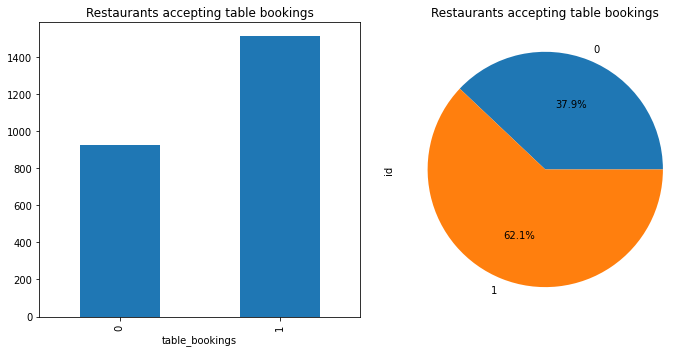

In [381]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
data.groupby(['table_bookings'])['id'].count().plot(kind='bar',title='Restaurants accepting table bookings',ax=ax[0])
plt.ylabel('Number of restaurants');
data.groupby(['table_bookings'])['id'].count().plot(kind='pie',title='Restaurants accepting table bookings',ax=ax[1],autopct='%1.1f%%')
fig.tight_layout()
plt.show()

[1] Majority (about 60%) of restaurants *take* table bookings.

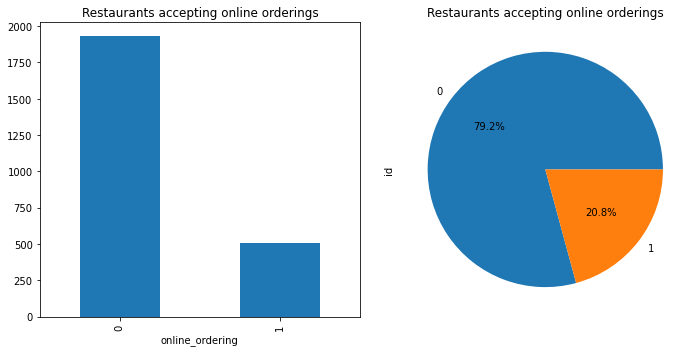

In [382]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
data.groupby(['online_ordering'])['id'].count().plot(kind='bar',title='Restaurants accepting online orderings',ax=ax[0])
plt.ylabel(['Online orders'])
data.groupby(['online_ordering'])['id'].count().plot(kind='pie',title='Restaurants accepting online orderings',autopct='%1.1f%%',ax=ax[1])
fig.tight_layout()
plt.show()

[1] Majority (around 80%) of the restaurants *do not* accept online orders.

/Users/vashishtha/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


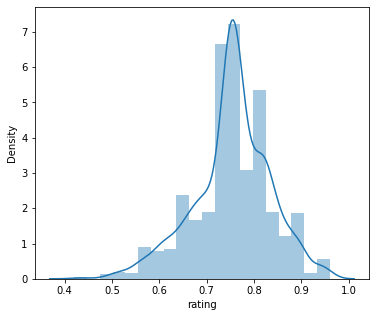

In [383]:
"""
Analyzing ratings.
"""

plt.figure(figsize=(6,5))
rating=data['rating']
sns.distplot(rating,bins=20)
plt.show()

1. Getting a 4.5 star rating is rare.
2. Most restaurants get a rating between 3.5 and 4 stars.

In [384]:
data.dropna(inplace=True)

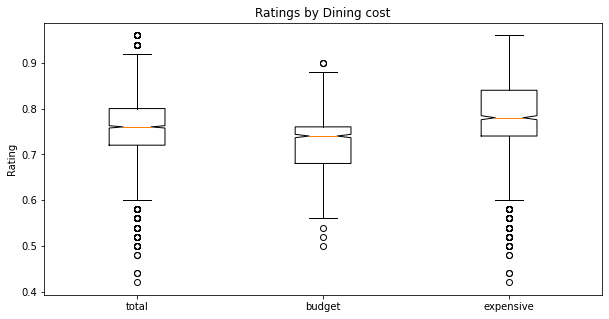

In [385]:
plt.figure(figsize=(10,5))
totals = data['rating'].tolist()
budgets = data[data['dining_cost']==0]['rating'].tolist()
expensives = data[data['dining_cost']==1]['rating'].tolist()
labels = ['total','budget','expensive']
plt.boxplot([totals,budgets,expensives],notch=True)
plt.xticks(list(range(1,len(labels)+1)), labels)
plt.title("Ratings by Dining cost")
plt.ylabel("Rating")
plt.show()

Inference:
1. Expensive restaurants have higher median rating than budget ones.
2. Expensive restaurants have higher lower outliers as compared to the budget ones.

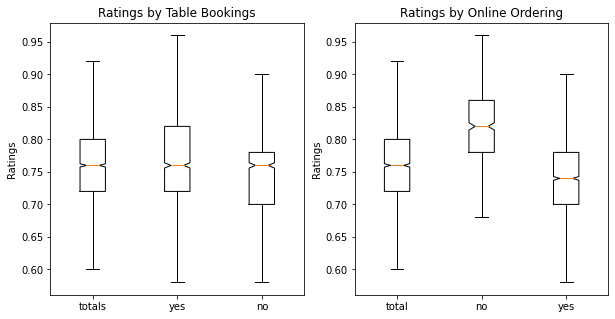

In [386]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
yes = data[data['table_bookings']==1]['rating']
no = data[data['table_bookings']==0]['rating']
ax[0].boxplot([totals,yes,no],sym ='',notch=True)
labels=['totals','yes','no']
ax[0].set(ylabel= 'Ratings',title='Ratings by Table Bookings')
ax[0].set_xticklabels(labels)

no = data[data['online_ordering']==0]['rating']
yes = data[data['online_ordering']==1]['rating']
labels=['total','no','yes']
ax[1].boxplot([totals,yes,no],sym ='',notch=True)
ax[1].set(ylabel= 'Ratings',title='Ratings by Online Ordering')
ax[1].set_xticklabels(labels)
plt.show()

1. Restaurants with online ordering have a lower rating than those that donot.
2. Restaurants with table bookings donot have much influence ratings

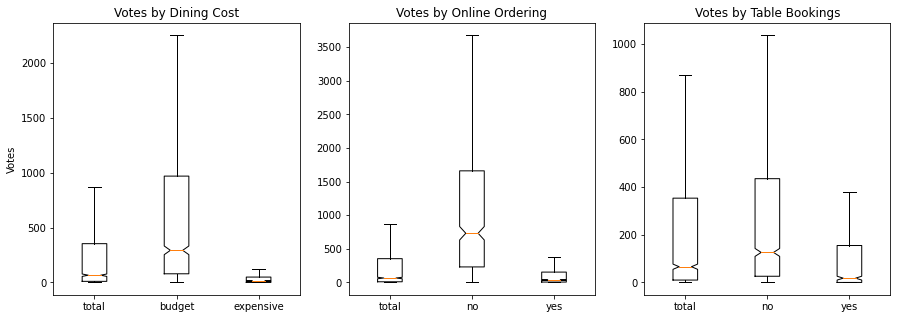

In [387]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
total = data['votes'].tolist()
no = data[data['dining_cost']==0]['votes']
yes = data[data['dining_cost']==1]['votes']
labels=['total','budget','expensive']
ax[0].boxplot([total,yes,no],sym ='',notch=True)
ax[0].set(ylabel='Votes',title='Votes by Dining Cost')
ax[0].set_xticklabels(labels)

no = data[data['online_ordering']==0]['votes']
yes = data[data['online_ordering']==1]['votes']
labels=['total','no','yes']
ax[1].boxplot([total,yes,no],sym ='',notch=True)
ax[1].set(title='Votes by Online Ordering')
ax[1].set_xticklabels(labels)

no = data[data['table_bookings']==0]['votes']
yes = data[data['table_bookings']==1]['votes']
labels=['total','no','yes']
ax[2].boxplot([total,yes,no],sym ='',notch=True)
ax[2].set(title='Votes by Table Bookings')
ax[2].set_xticklabels(labels)

plt.show()

1. Expensive restaurants get less votes than budget ones.
2. Restaurants with Online ordering get less votes than ones that do not have online orderig
3. Restaurants with table booking get less votes than ones that do not have online orderig

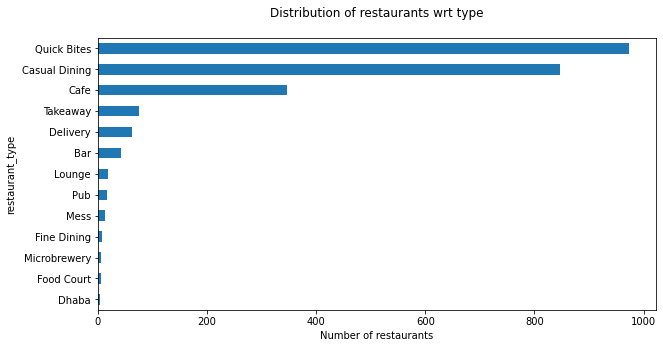

In [388]:
plt.figure(figsize=(10,5))
data.groupby('restaurant_type')['id'].count().sort_values().plot.barh(title= 'Distribution of restaurants wrt type\n')
plt.xlabel('Number of restaurants', fontsize = 10);
plt.show()

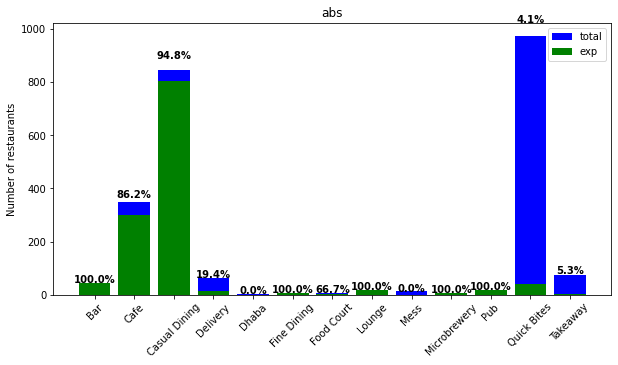

In [389]:
plt.figure(figsize=(10,5))
y1 = data.groupby('restaurant_type')['dining_cost'].count()
y2 = data.groupby('restaurant_type')['dining_cost'].sum()
labels=data.groupby('restaurant_type')['id'].sum().reset_index()['restaurant_type']
graph = plt.bar(labels,y1,color='blue',label='total')
plt.bar(labels,y2,color='green',label='exp')
plt.ylabel("Number of restaurants")
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')
plt.title('abs')

pc = y2*100/y1
for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.05,
             str(round(pc[i],1))+'%',
             ha='center',
             weight='bold')

fig.tight_layout()
plt.show()

1. Quick bites and casual dinig make up for most of the restaurant types.
2. Most casual dining are expensive and quick bites are budget restaurants.

<AxesSubplot:title={'center':'asx'}, ylabel='restaurant_operation'>

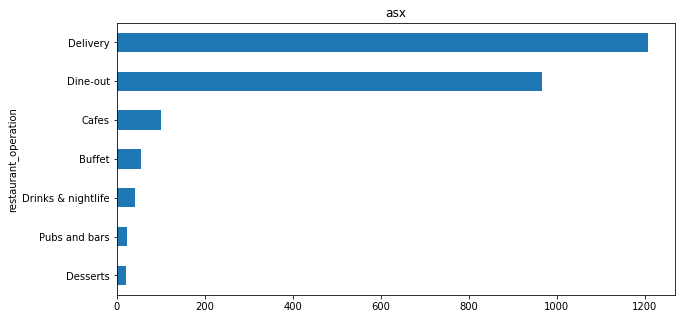

In [390]:
plt.figure(figsize=(10,5))
data.groupby('restaurant_operation')['id'].count().sort_values().plot.barh(title='asx')

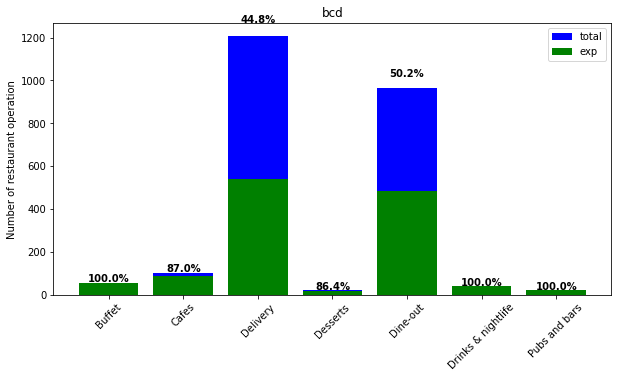

In [391]:
plt.figure(figsize=(10,5))
pop = data.groupby('restaurant_operation')['dining_cost'].count()
exp = data.groupby('restaurant_operation')['dining_cost'].sum()
labels = data.groupby('restaurant_operation')['id'].count().reset_index()['restaurant_operation']
graph = plt.bar(labels,pop,color='blue',label='total')
plt.bar(labels,exp,color='green',label='exp')
plt.legend(loc = 'upper right')
plt.xticks(rotation=45)
plt.ylabel('Number of restaurant operation')
plt.title('bcd')

pc = exp/pop * 100
for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.05,
             str(round(pc[i],1))+'%',
             ha='center',
             weight='bold')



1. Most restaurants have delivery and dine-out.
2. Most cafes are expensive

<AxesSubplot:title={'center':'asc'}, ylabel='primary_cuisine'>

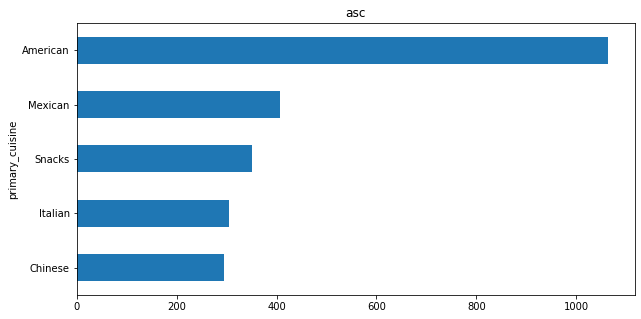

In [392]:
plt.figure(figsize=(10,5))
data.groupby('primary_cuisine')['id'].count().sort_values().plot.barh(title='asc')

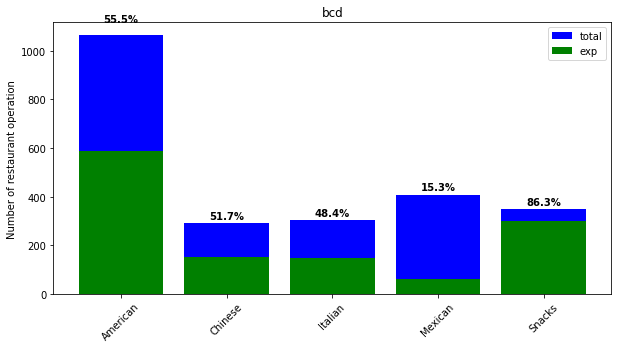

In [393]:
plt.figure(figsize=(10,5))
pop = data.groupby('primary_cuisine')['dining_cost'].count()
exp = data.groupby('primary_cuisine')['dining_cost'].sum()
labels = data.groupby('primary_cuisine')['id'].count().reset_index()['primary_cuisine']
graph = plt.bar(labels,pop,color='blue',label='total')
plt.bar(labels,exp,color='green',label='exp')
plt.legend(loc = 'upper right')
plt.xticks(rotation=45)
plt.ylabel('Number of restaurant operation')
plt.title('bcd')

pc = exp/pop * 100
for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.05,
             str(round(pc[i],1))+'%',
             ha='center',
             weight='bold')

1. Most famouse cuisines are American.
2. Most snack are expensive.
3. Mexican cusine is the second most famous and are mostly budget.

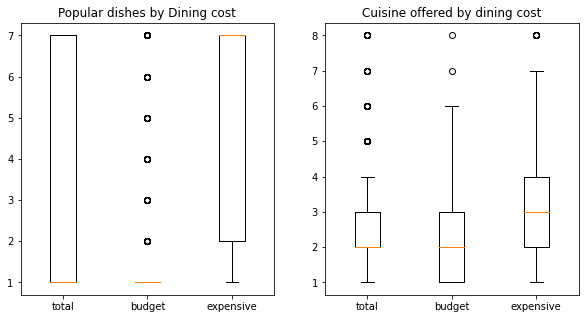

In [394]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
total = data['popular_dishes']
budget = data[data['dining_cost']==0]['popular_dishes']
expensive = data[data['dining_cost']==1]['popular_dishes']
labels = ['total','budget','expensive']
ax[0].boxplot([total,budget,expensive])
ax[0].set(title='Popular dishes by Dining cost',label=labels)
ax[0].set_xticklabels(labels)

total = data['cuisines_offered']
budget = data[data['dining_cost']==0]['cuisines_offered']
expensive = data[data['dining_cost']==1]['cuisines_offered']
labels = ['total','budget','expensive']
ax[1].boxplot([total,budget,expensive])
ax[1].set(title='Cuisine offered by dining cost')
ax[1].set_xticklabels(labels)

plt.show()

1. Most budget restaurants have 1 popular dish
2. Most expensive restaurants have 7 popular dishes.
3. Most expensive restaurants offer more cuisines than budget restaurants.

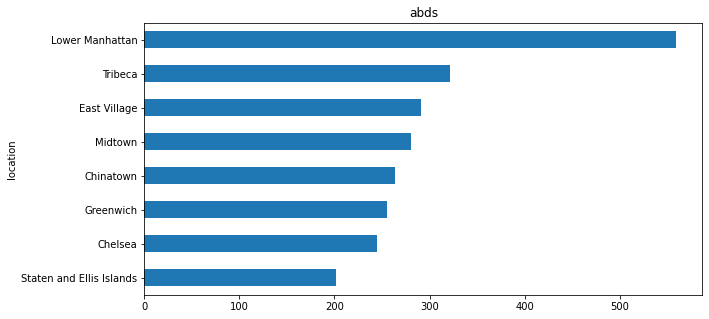

In [395]:
plt.figure(figsize=(10,5))
dir(data.groupby('location')['id'].count().sort_values().plot.barh(title='abds'))
plt.show()

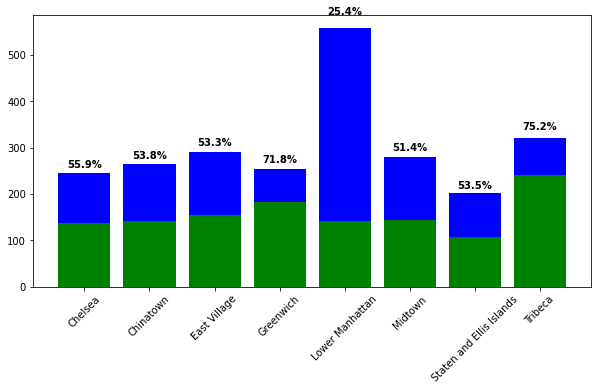

In [396]:
plt.figure(figsize=(10,5))
total = data.groupby('location')['dining_cost'].count()
expensive = data.groupby('location')['dining_cost'].sum()
labels = data.groupby('location').count().reset_index()['location']
graph = plt.bar(labels,total,color='blue')
plt.bar(labels,expensive,color='green')
plt.xticks(rotation=45)

pc = expensive/total*100
for i,p in enumerate(graph):
    width  = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    plt.text(x + width/2,
             y + height*1.05,
             str(round(pc[i],1))+'%',
             ha='center',
             weight='bold'
            )
plt.show()

## Model

In [397]:
data.drop(columns=['id'],inplace=True)
one_hot = ['location','restaurant_operation','restaurant_type','primary_cuisine']
data = pd.get_dummies(data,columns=one_hot)


In [398]:
data

,table_bookings,online_ordering,rating,votes,popular_dishes,cuisines_offered,dining_cost,location_Chelsea,location_Chinatown,location_East Village,location_Greenwich,location_Lower Manhattan,location_Midtown,location_Staten and Ellis Islands,location_Tribeca,restaurant_operation_Buffet,restaurant_operation_Cafes,restaurant_operation_Delivery,restaurant_operation_Desserts,restaurant_operation_Dine-out,restaurant_operation_Drinks & nightlife,restaurant_operation_Pubs and bars,restaurant_type_Bar,restaurant_type_Cafe,restaurant_type_Casual Dining,restaurant_type_Delivery,restaurant_type_Dhaba,restaurant_type_Fine Dining,restaurant_type_Food Court,restaurant_type_Lounge,restaurant_type_Mess,restaurant_type_Microbrewery,restaurant_type_Pub,restaurant_type_Quick Bites,restaurant_type_Takeaway,primary_cuisine_American,primary_cuisine_Chinese,primary_cuisine_Italian,primary_cuisine_Mexican,primary_cuisine_Snacks
0,0,0,0.84,1651.0,7.0,4.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0.86,2248.0,7.0,3.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0.88,1095.0,7.0,2.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0.68,17.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0.82,2727.0,7.0,3.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,0,0,0.66,6.0,1.0,2.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2431,0,0,0.62,21.0,1.0,3.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2432,0,0,0.76,63.0,2.0,3.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2433,0,0,0.76,0.0,1.0,2.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [399]:
X_train,X_valid,y_train,y_valid = train_test_split(data.drop(['dining_cost'],axis=1),
                                                   data[['dining_cost']],
                                                   train_size=0.8)

In [400]:
model = LogisticRegression()
clf = model.fit(X_train,y_train)
y_pred = clf.predict(X_valid)
accuracy_score(y_pred,y_valid)

/Users/vashishtha/env/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vashishtha/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9132231404958677

In [401]:
model = XGBClassifier()
clf = model.fit(X_train,y_train)
y_pred = clf.predict(X_valid)
accuracy_score(y_pred,y_valid)

0.9607438016528925

In [402]:
feature_imp = pd.DataFrame([*zip(X_train.columns,model.feature_importances_)])
rename = {0:'variable',1:'importance'}
feature_imp.rename(columns=rename,inplace=True)
feature_imp

,variable,importance
0,table_bookings,0.005992
1,online_ordering,0.022420
2,rating,0.006441
3,votes,0.010009
4,popular_dishes,0.005264
5,cuisines_offered,0.008942
6,location_Chelsea,0.011576
7,location_Chinatown,0.003049
8,location_East Village,0.005111
9,location_Greenwich,0.002704


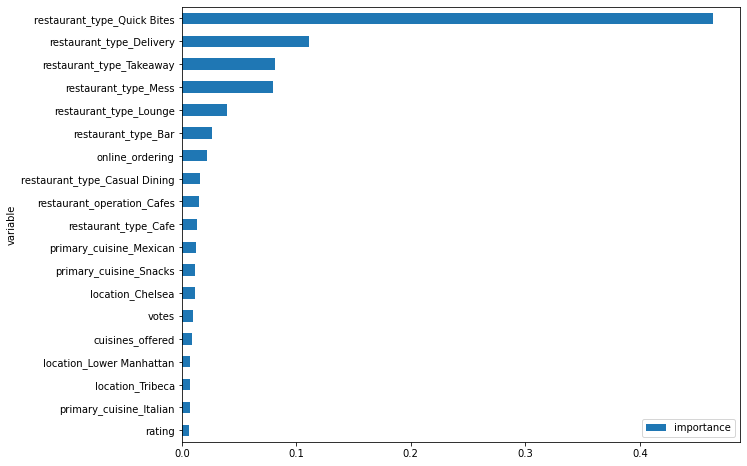

In [403]:
feature_imp.sort_values(by='importance',inplace=True)
feature_imp.iloc[20:,].plot.barh(x='variable',y='importance',figsize=(10,8))
plt.show()

In [404]:
feature_imp.iloc[20:,]

,variable,importance
2,rating,0.006441
36,primary_cuisine_Italian,0.006813
13,location_Tribeca,0.006919
10,location_Lower Manhattan,0.007458
5,cuisines_offered,0.008942
3,votes,0.010009
6,location_Chelsea,0.011576
38,primary_cuisine_Snacks,0.011758
37,primary_cuisine_Mexican,0.012643
22,restaurant_type_Cafe,0.012856
